# Key Levels mix clustering

In [8]:
import warnings
warnings.filterwarnings('ignore')

import time
from datetime import date, datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_ta as ta
from sklearn.cluster import KMeans
import pickle

In [9]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/VN30ps/clusters/v2/VN30F1M_5m_data_train.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    dataset = []
dataset

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,cluster
Date,,,,,,,,,,,,,,,,,
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329,-0.5,0.5,0.0,-0.7,0.8,-0.7,0.1,-0.7,0.2,-0.6,-0.6,185
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722,-0.9,0.4,-0.8,-1.4,-0.4,-0.9,-0.9,-1.6,-0.1,-1.6,-0.8,6
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939,-0.4,1.7,-0.3,-1.3,0.0,-1.2,-0.4,-1.8,-0.8,-1.3,-1.3,6
2020-11-02 09:25:00,898.3,898.6,897.8,898.5,1607,-0.1,0.7,0.2,-0.1,2.0,0.0,0.3,-1.0,0.3,-0.9,-0.1,98
2020-11-02 09:30:00,898.5,899.4,898.3,899.0,1623,-0.4,0.7,0.5,0.4,1.2,0.7,0.5,0.4,2.5,0.5,0.8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 14:15:00,1229.9,1230.5,1227.3,1229.4,7567,-1.1,2.1,-0.5,-2.0,3.3,3.0,-0.4,-1.1,2.2,-1.1,2.2,131
2024-04-26 14:20:00,1229.8,1235.9,1229.4,1232.4,15934,-3.5,3.0,2.6,1.9,5.1,2.5,3.0,1.0,6.3,6.0,2.6,116
2024-04-26 14:25:00,1232.5,1236.5,1232.1,1232.1,13075,-4.4,0.0,-0.4,-3.8,2.7,2.3,-0.3,1.6,4.8,2.2,2.7,92


In [10]:
data = dataset.copy()
back_bar = 10
next_bar = back_bar -1
data['max_prev'] = data['High'].rolling(back_bar).max()
data['max_next'] = data['High'].shift(-next_bar).rolling(back_bar).max()
data['min_prev'] = data['Low'].rolling(next_bar).min()
data['min_next'] = data['Low'].shift(-next_bar).rolling(back_bar).min()
data

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,...,input_7,input_8,input_9,input_10,input_11,cluster,max_prev,max_next,min_prev,min_next
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329,-0.5,0.5,0.0,-0.7,0.8,...,0.1,-0.7,0.2,-0.6,-0.6,185,NaN,NaN,NaN,NaN
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722,-0.9,0.4,-0.8,-1.4,-0.4,...,-0.9,-1.6,-0.1,-1.6,-0.8,6,NaN,NaN,NaN,NaN
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939,-0.4,1.7,-0.3,-1.3,0.0,...,-0.4,-1.8,-0.8,-1.3,-1.3,6,NaN,NaN,NaN,NaN
2020-11-02 09:25:00,898.3,898.6,897.8,898.5,1607,-0.1,0.7,0.2,-0.1,2.0,...,0.3,-1.0,0.3,-0.9,-0.1,98,NaN,NaN,NaN,NaN
2020-11-02 09:30:00,898.5,899.4,898.3,899.0,1623,-0.4,0.7,0.5,0.4,1.2,...,0.5,0.4,2.5,0.5,0.8,28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 14:15:00,1229.9,1230.5,1227.3,1229.4,7567,-1.1,2.1,-0.5,-2.0,3.3,...,-0.4,-1.1,2.2,-1.1,2.2,131,1232.8,NaN,1225.1,NaN
2024-04-26 14:20:00,1229.8,1235.9,1229.4,1232.4,15934,-3.5,3.0,2.6,1.9,5.1,...,3.0,1.0,6.3,6.0,2.6,116,1235.9,NaN,1226.1,NaN
2024-04-26 14:25:00,1232.5,1236.5,1232.1,1232.1,13075,-4.4,0.0,-0.4,-3.8,2.7,...,-0.3,1.6,4.8,2.2,2.7,92,1236.5,NaN,1226.1,NaN


In [11]:
data['is_r_keylevel'] = data.apply(lambda r: True if (r['High'] == r['max_prev'] and r['High'] == r['max_next']) else False, axis=1)
data['is_s_keylevel'] = data.apply(lambda r: True if (r['Low'] == r['min_prev'] and r['Low'] == r['min_next']) else False, axis=1)
data

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,...,input_9,input_10,input_11,cluster,max_prev,max_next,min_prev,min_next,is_r_keylevel,is_s_keylevel
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329,-0.5,0.5,0.0,-0.7,0.8,...,0.2,-0.6,-0.6,185,NaN,NaN,NaN,NaN,False,False
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722,-0.9,0.4,-0.8,-1.4,-0.4,...,-0.1,-1.6,-0.8,6,NaN,NaN,NaN,NaN,False,False
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939,-0.4,1.7,-0.3,-1.3,0.0,...,-0.8,-1.3,-1.3,6,NaN,NaN,NaN,NaN,False,False
2020-11-02 09:25:00,898.3,898.6,897.8,898.5,1607,-0.1,0.7,0.2,-0.1,2.0,...,0.3,-0.9,-0.1,98,NaN,NaN,NaN,NaN,False,False
2020-11-02 09:30:00,898.5,899.4,898.3,899.0,1623,-0.4,0.7,0.5,0.4,1.2,...,2.5,0.5,0.8,28,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 14:15:00,1229.9,1230.5,1227.3,1229.4,7567,-1.1,2.1,-0.5,-2.0,3.3,...,2.2,-1.1,2.2,131,1232.8,NaN,1225.1,NaN,False,False
2024-04-26 14:20:00,1229.8,1235.9,1229.4,1232.4,15934,-3.5,3.0,2.6,1.9,5.1,...,6.3,6.0,2.6,116,1235.9,NaN,1226.1,NaN,False,False
2024-04-26 14:25:00,1232.5,1236.5,1232.1,1232.1,13075,-4.4,0.0,-0.4,-3.8,2.7,...,4.8,2.2,2.7,92,1236.5,NaN,1226.1,NaN,False,False


In [12]:
data['is_r_keylevel'] = data['is_r_keylevel'].shift(1)
data['is_s_keylevel'] = data['is_s_keylevel'].shift(1)

In [13]:
data

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,...,input_9,input_10,input_11,cluster,max_prev,max_next,min_prev,min_next,is_r_keylevel,is_s_keylevel
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329,-0.5,0.5,0.0,-0.7,0.8,...,0.2,-0.6,-0.6,185,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722,-0.9,0.4,-0.8,-1.4,-0.4,...,-0.1,-1.6,-0.8,6,NaN,NaN,NaN,NaN,False,False
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939,-0.4,1.7,-0.3,-1.3,0.0,...,-0.8,-1.3,-1.3,6,NaN,NaN,NaN,NaN,False,False
2020-11-02 09:25:00,898.3,898.6,897.8,898.5,1607,-0.1,0.7,0.2,-0.1,2.0,...,0.3,-0.9,-0.1,98,NaN,NaN,NaN,NaN,False,False
2020-11-02 09:30:00,898.5,899.4,898.3,899.0,1623,-0.4,0.7,0.5,0.4,1.2,...,2.5,0.5,0.8,28,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 14:15:00,1229.9,1230.5,1227.3,1229.4,7567,-1.1,2.1,-0.5,-2.0,3.3,...,2.2,-1.1,2.2,131,1232.8,NaN,1225.1,NaN,False,False
2024-04-26 14:20:00,1229.8,1235.9,1229.4,1232.4,15934,-3.5,3.0,2.6,1.9,5.1,...,6.3,6.0,2.6,116,1235.9,NaN,1226.1,NaN,False,False
2024-04-26 14:25:00,1232.5,1236.5,1232.1,1232.1,13075,-4.4,0.0,-0.4,-3.8,2.7,...,4.8,2.2,2.7,92,1236.5,NaN,1226.1,NaN,False,False


In [14]:
supply_data = data[data['is_r_keylevel'] == True]
demand_data = data[data['is_s_keylevel'] == True]
normal_data = data[(data['is_r_keylevel'] != True) & (data['is_s_keylevel'] != True)]

<Axes: ylabel='Frequency'>

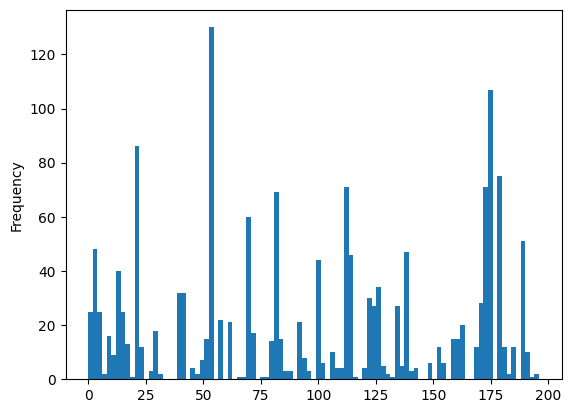

In [16]:
supply_data['cluster'].plot.hist(bins=97)

<Axes: ylabel='Frequency'>

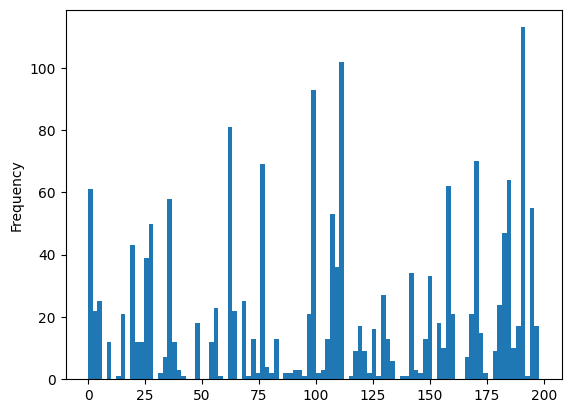

In [17]:
demand_data['cluster'].plot.hist(bins=97)

<Axes: ylabel='Frequency'>

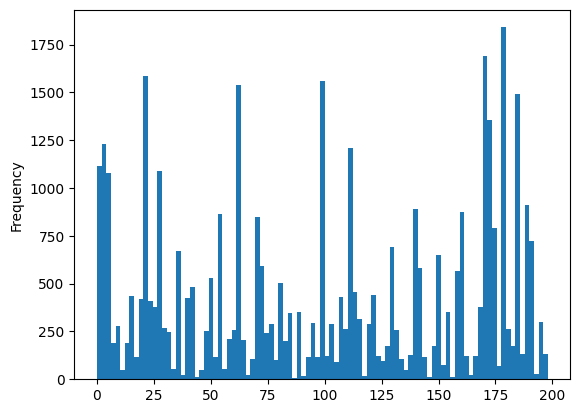

In [18]:
normal_data['cluster'].plot.hist(bins=97)

In [19]:
#Short
grouped_a = supply_data[['cluster']].groupby([supply_data.cluster]).count().rename(columns={'cluster': 'count'})
grouped_a['count'].sort_values(ascending=False)

cluster
54     129
22      86
173     71
113     70
174     69
      ... 
76       1
52       1
53       1
67       1
161      1
Name: count, Length: 100, dtype: int64

In [20]:
#Long
grouped_b = demand_data[['cluster']].groupby([demand_data.cluster]).count().rename(columns={'cluster': 'count'})
grouped_b['count'].sort_values(ascending=False)

cluster
191    113
62      81
98      74
171     68
159     62
      ... 
175      1
174      1
14       1
1        1
95       1
Name: count, Length: 113, dtype: int64

In [21]:
#Hold or None
grouped_c = normal_data[['cluster']].groupby([normal_data.cluster]).count().rename(columns={'cluster': 'count'})
grouped_c['count'].sort_values(ascending=False)

cluster
22     1538
62     1537
171    1521
185    1371
173    1319
       ... 
63        1
93        1
57        1
79        1
145       1
Name: count, Length: 197, dtype: int64

In [25]:
data_x = data[data.cluster == 179]
grouped_d = data_x[['cluster']].groupby([data_x.is_r_keylevel, data_x.is_s_keylevel]).count().rename(columns={'cluster': 'count'})
grouped_d['count'].sort_values(ascending=False)

is_r_keylevel  is_s_keylevel
False          False            735
True           False            129
False          True               2
Name: count, dtype: int64

In [24]:
data_y = data[data.cluster == 54]
data_y

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,...,input_9,input_10,input_11,cluster,max_prev,max_next,min_prev,min_next,is_r_keylevel,is_s_keylevel
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02 10:35:00,899.6,900.4,899.1,899.4,1106,-1.0,0.3,-0.2,-0.7,0.1,...,0.6,0.3,-0.5,54,901.5,900.4,898.6,895.4,False,False
2020-11-02 13:40:00,899.2,899.2,897.0,897.7,2626,-1.5,0.7,-1.5,-1.8,-0.3,...,1.1,1.1,-0.6,54,900.4,907.0,896.3,896.6,False,False
2020-11-02 14:00:00,901.8,902.4,901.2,901.5,3062,-0.9,0.3,-0.3,-1.4,0.4,...,1.1,1.1,-1.0,54,903.0,909.4,896.4,896.6,False,False
2020-11-03 13:35:00,907.0,907.1,906.0,906.4,2513,-0.7,0.4,-0.6,-1.4,-0.6,...,0.7,0.1,-1.0,54,908.5,910.4,905.5,903.7,False,False
2020-11-04 10:25:00,911.0,911.2,910.5,910.6,2110,-0.6,0.1,-0.4,-1.2,-0.4,...,0.8,0.4,-0.9,54,911.8,914.6,906.8,910.5,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15 13:30:00,1277.0,1277.0,1275.7,1276.4,2993,-0.6,0.7,-0.6,-1.1,0.3,...,0.9,0.7,0.0,54,1277.5,1277.0,1272.2,1256.6,True,False
2024-04-17 11:20:00,1226.7,1227.6,1226.4,1226.7,2740,-0.9,0.3,0.0,-1.0,0.6,...,0.9,0.3,-0.2,54,1228.3,1228.3,1224.0,1222.7,False,False
2024-04-19 10:30:00,1202.2,1203.2,1200.7,1201.3,3979,-1.9,0.6,-0.9,-1.4,1.6,...,0.7,0.4,-0.6,54,1203.9,1203.2,1198.5,1192.3,False,False
